In [2]:
import utilities as util
import preprocessor as prep
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from folium.plugins import MousePosition
import folium

<h1> Tiger Shark - Galeocerdo Cuvier</h1>


![Alt text](../data/Images/Tiger_shark.jpg)

link to license: https://creativecommons.org/licenses/by-sa/3.0/legalcode


<h3>Data</h3>

link: https://search.dataone.org/view/10.24431/rw1k44e

citation: 

Matthew Ajemian, Neil Hammerschlag, Marcus Drymon, David Wells, & Brett Falterman. (2020). Movement Patterns and Habitat Use of Tiger Sharks Across Ontogeny in the Gulf of Mexico, 2010-2018. Research Workspace. 10.24431/rw1k44e, version: 10.24431_rw1k44e_2020_6_16_211810.

In [3]:
tiger_sharks_full = pd.read_csv('C:/Users/Ben/Documents/GitHub/Animal-Motion-for-predictions/data/animals/tiger_sharks_full.csv')
tiger_sharks_full.head(2)

,date,longitude,latitude,name,year,depth,species,Barometric Pressure,Wind Speed (kn),Air Temp (°F)
0,2018-10-27 01:57:00,-79.6616,26.3665,19687,2018,39.800587,Galeocerdo Cuvier,1011.5,6.8,79.5
1,2018-10-27 12:57:00,-79.6805,26.4014,19687,2018,17.158911,Galeocerdo Cuvier,1014.4,6.22,77.2


In [4]:
print(type(tiger_sharks_full['Barometric Pressure'].iloc[0]))
print(type(tiger_sharks_full['Wind Speed (kn)'].iloc[0]))
print(type(tiger_sharks_full['Air Temp (°F)'].iloc[0]))

<class 'str'>
<class 'str'>
<class 'str'>


In [5]:
tiger_sharks_full['Barometric Pressure'] = tiger_sharks_full['Barometric Pressure'].replace('-', float('nan'))
tiger_sharks_full['Wind Speed (kn)'] = tiger_sharks_full['Wind Speed (kn)'].replace('-', float('nan'))
tiger_sharks_full['Air Temp (°F)'] = tiger_sharks_full['Air Temp (°F)'].replace('-', float('nan'))

tiger_sharks_full['Barometric Pressure'] = tiger_sharks_full['Barometric Pressure'].astype(float)
tiger_sharks_full['Wind Speed (kn)'] = tiger_sharks_full['Wind Speed (kn)'].astype(float)
tiger_sharks_full['Air Temp (°F)'] = tiger_sharks_full['Air Temp (°F)'].astype(float)


In [6]:
print(type(tiger_sharks_full['Barometric Pressure'].iloc[0]))
print(type(tiger_sharks_full['Wind Speed (kn)'].iloc[0]))
print(type(tiger_sharks_full['Air Temp (°F)'].iloc[0]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


C:\Users\Ben\AppData\Local\Temp\ipykernel_6768\1774330569.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = tiger_sharks_full.corr()


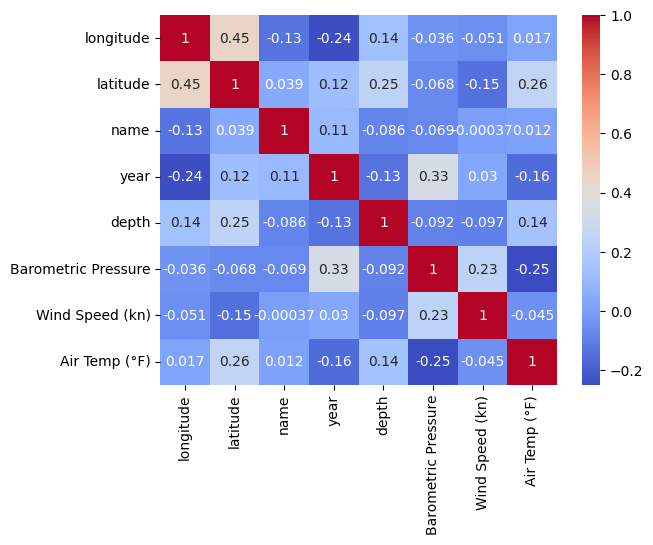

In [7]:
correlation_matrix = tiger_sharks_full.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [8]:
map  = folium.Map(location=[20,-80],zoom_start=4)
util.make_heatMap(map, tiger_sharks_full)
map

In [9]:

# def make_polylines(map, animals):
#     i = len(util.color_list)-1
#     for shark_name, group in animals.groupby('name'):
#         feature_group = folium.FeatureGroup(name = shark_name).add_to(map)
#         line = folium.PolyLine(locations = list(zip(group['latitude'],group['longitude'])), color = util.color_list[i]).add_to(feature_group)
#         i = i-1
#         if i==-1:
#             i = len(util.color_list)-1
#     folium.map.LayerControl(position='topright', collapsed=False).add_to(map)
#     MousePosition().add_to(map)
#     return map

# def mark_map_multiple(map,animal, the_icon ='lion'):
#     color_index = len(util.color_list)-1
#     for shark_name, group in animal.groupby('name'):
#         feature_group = folium.FeatureGroup(name = shark_name).add_to(map)
#         mean_lat = group['latitude'].mean()
#         mean_lon = group['longitude'].mean()
#         for i in range(group.shape[0]):
#             lat = group['latitude'].iloc[i]
#             lon = group['longitude'].iloc[i]
#             date2 = group['date'].iloc[i]
#             name = group['name'].iloc[i]        
#             folium.Marker([lat, lon], popup = [name, date2], icon=folium.Icon(color=util.color_list[color_index],icon=the_icon,prefix='fa')).add_to(feature_group)
#             color_index = color_index-1
#             if color_index==-1:
#                 color_index = len(util.color_list)-1
#     folium.map.LayerControl(position='topright', collapsed=False).add_to(map)
#     MousePosition().add_to(map)
#     return map



In [10]:
map  = folium.Map(location=[20,-80],zoom_start=4)
util.make_polylines(map,tiger_sharks_full)
map

In [11]:
import folium
import folium.plugins as plugins

# Create your HeatMap
heatmap = plugins.HeatMap(data=tiger_sharks_full[['latitude', 'longitude']], radius=15)

# Add the HeatMap to a map
m = folium.Map(location=[20, -80], zoom_start=10)
heatmap.add_to(m)

# Filter the data to get the reddest points (points with intensity > threshold)
threshold = 0.0000005  # Adjust this threshold based on your heatmap intensity values
reddest_points = filter(lambda point: len(point) > 2 and point[2] > threshold, heatmap.data)

# Print the coordinates of the reddest points
print("Reddest Points Coordinates:")
for point in reddest_points:
    print(point)
    latitude, longitude = point[:2]
    print("Latitude:", latitude)
    print("Longitude:", longitude)
    print()  # Add a new line for clarity


Reddest Points Coordinates:


In [12]:
import folium
import folium.plugins as plugins

# Create your HeatMap
heatmap = plugins.HeatMap(data=tiger_sharks_full[['latitude', 'longitude']], radius=15)

# Add the HeatMap to a map
m = folium.Map(location=[20, -80], zoom_start=10)
heatmap.add_to(m)

# Retrieve the "reddest" point
if heatmap.data:  # Check if the data list is not empty
    reddest_point = max(heatmap.data, key=lambda point: point[2] if len(point) > 2 else 0)
    if len(reddest_point) >= 2:
        reddest_latitude, reddest_longitude = reddest_point[:2]
        print("Reddest Point Coordinates:")
        print("Latitude:", reddest_latitude)
        print("Longitude:", reddest_longitude)
    else:
        print("Invalid data format for the 'reddest' point.")
else:
    print("No data points available in the HeatMap.")


Reddest Point Coordinates:
Latitude: 26.3665
Longitude: -79.6616


In [20]:
# print(util.freq_visited_coordinates[0][1])
print(util.freq_visited_coordinates[0])
for i in util.freq_visited_coordinates:
    print(i)

(27.07892, -79.231)
(27.07892, -79.231)
(24.967, -80.94)
(24.52352, -82.78676)
(26.20509, -82.05591)
(27.90888, -84.174475)
(29.2778, -84.163)
(30.32088, -86.5547)
(28.06455, -94.51558)
(28.36448, -91.68008)


In [30]:
def closest_feeding_spot(shark_lat, shark_lon):
    min_dist = 1000000
    closest_spot = None
    for feeding_spot in util.freq_visited_coordinates:
        dist = util.haversine(feeding_spot[0],feeding_spot[1],shark_lat,shark_lon)
        if dist < min_dist:
            min_dist = dist
            closest_spot = feeding_spot
    return min_dist

tiger_sharks_full['Dist from Feeding Spot (km)'] = tiger_sharks_full.apply(
    lambda row: closest_feeding_spot(row['latitude'], row['longitude']),
    axis=1
)     

In [32]:
tiger_sharks_full.columns

Index(['date', 'longitude', 'latitude', 'name', 'year', 'depth', 'species',
       'Barometric Pressure', 'Wind Speed (kn)', 'Air Temp (°F)',
       'Dist from Feeding Spot (km)'],
      dtype='object')

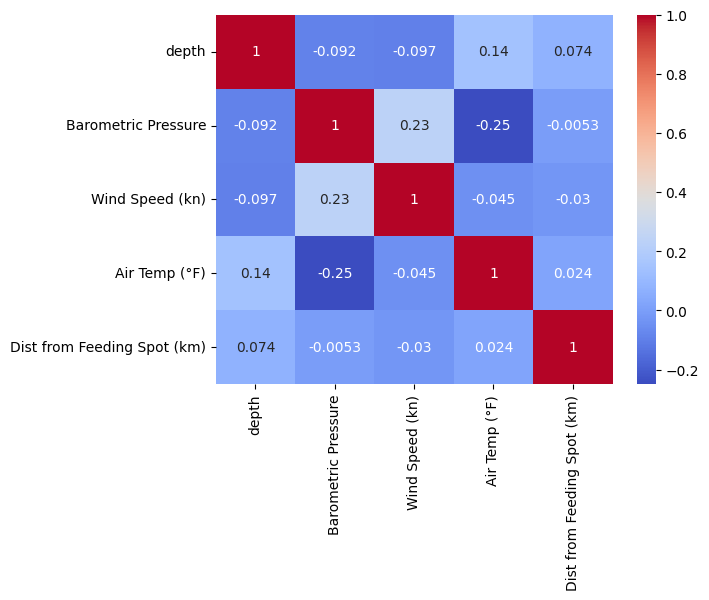

In [38]:
tiger_sharks_subset = tiger_sharks_full[['depth','Barometric Pressure','Wind Speed (kn)', 'Air Temp (°F)','Dist from Feeding Spot (km)']]
correlation_matrix = tiger_sharks_subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [72]:
tiger_sharks_full_copy = tiger_sharks_full.copy()
full_hurricane_1992 = prep.process_hurricane_txt('C:/Users/Ben/Documents/GitHub/Animal-Motion-for-predictions/data/hurricanes_1992.txt')
tiger_sharks_full_copy = tiger_sharks_full_copy.sort_values('date')
tiger_sharks_full_copy[tiger_sharks_full_copy['year']==2012]['name'].unique()

c:\Users\Ben\Documents\GitHub\Animal-Motion-for-predictions\src\preprocessor.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat_column.iloc[i] = lat
c:\Users\Ben\Documents\GitHub\Animal-Motion-for-predictions\src\preprocessor.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lon_column.iloc[i] = lon


array([120899, 120901, 120881, 120900, 120894], dtype=int64)

In [75]:
map = folium.Map()
SANDY = full_hurricane_1992.loc[full_hurricane_1992['name'] == 'SANDY']
RAFAEL = full_hurricane_1992.loc[full_hurricane_1992['name'] == 'RAFAEL']
TONY = full_hurricane_1992.loc[full_hurricane_1992['name'] == 'TONY']

util.mark_layered_map(map,'Hurricane SANDY',SANDY,'tornado','black')
util.mark_layered_map(map,'Hurricane SANDY',TONY,'tornado','orange')
util.mark_layered_map(map,'Hurricane SANDY',RAFAEL,'tornado','pink')

util.mark_layered_map(map,'s',tiger_sharks_full_copy[tiger_sharks_full_copy['name']==120899],'fish','blue')
util.mark_layered_map(map,'s',tiger_sharks_full_copy[tiger_sharks_full_copy['name']==120901],'fish','white')
util.mark_layered_map(map,'s',tiger_sharks_full_copy[tiger_sharks_full_copy['name']==120881],'fish','pink')
util.mark_layered_map(map,'s',tiger_sharks_full_copy[tiger_sharks_full_copy['name']==120900],'fish','green')
util.mark_layered_map(map,'s',tiger_sharks_full_copy[tiger_sharks_full_copy['name']==120894],'fish','red')
folium.map.LayerControl(position='topright', collapsed=False).add_to(map)

map


C:\Users\Ben\AppData\Local\Temp\ipykernel_6768\2440039238.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiger_sharks_2015['date'] = pd.to_datetime(tiger_sharks_2015['date'])


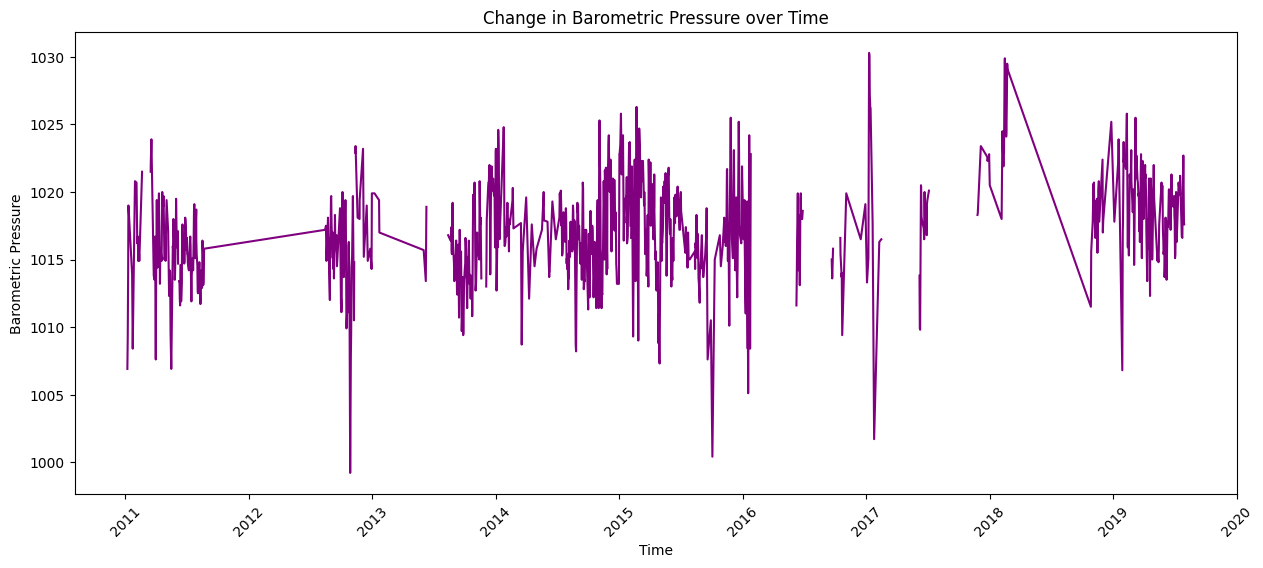

In [58]:
import matplotlib.pyplot as plt
tiger_sharks_2015 = tiger_sharks_full[tiger_sharks_full['year']==2015]
# Assuming you have a 'Time' column in your DataFrame in a datetime format
# Convert 'Time' column to datetime if it's not already in datetime format
tiger_sharks_2015['date'] = pd.to_datetime(tiger_sharks_2015['date'])
tiger_sharks_full['date'] = pd.to_datetime(tiger_sharks_full['date'])

# Group the data by date and select the first timestamp of each day
tiger_sharks_2015_daily = tiger_sharks_2015.groupby(tiger_sharks_2015['date'].dt.date).first()
tiger_sharks_daily = tiger_sharks_full.groupby(tiger_sharks_full['date'].dt.date).first()
plt.figure(figsize=(15, 6))  # Adjust the width (12) as desired

# Plot the barometric pressure
plt.plot(tiger_sharks_daily['date'], tiger_sharks_daily['Barometric Pressure'],color= 'purple')
plt.xlabel('Time')
plt.ylabel('Barometric Pressure')
plt.title('Change in Barometric Pressure over Time')
plt.xticks(rotation=45)
plt.show()


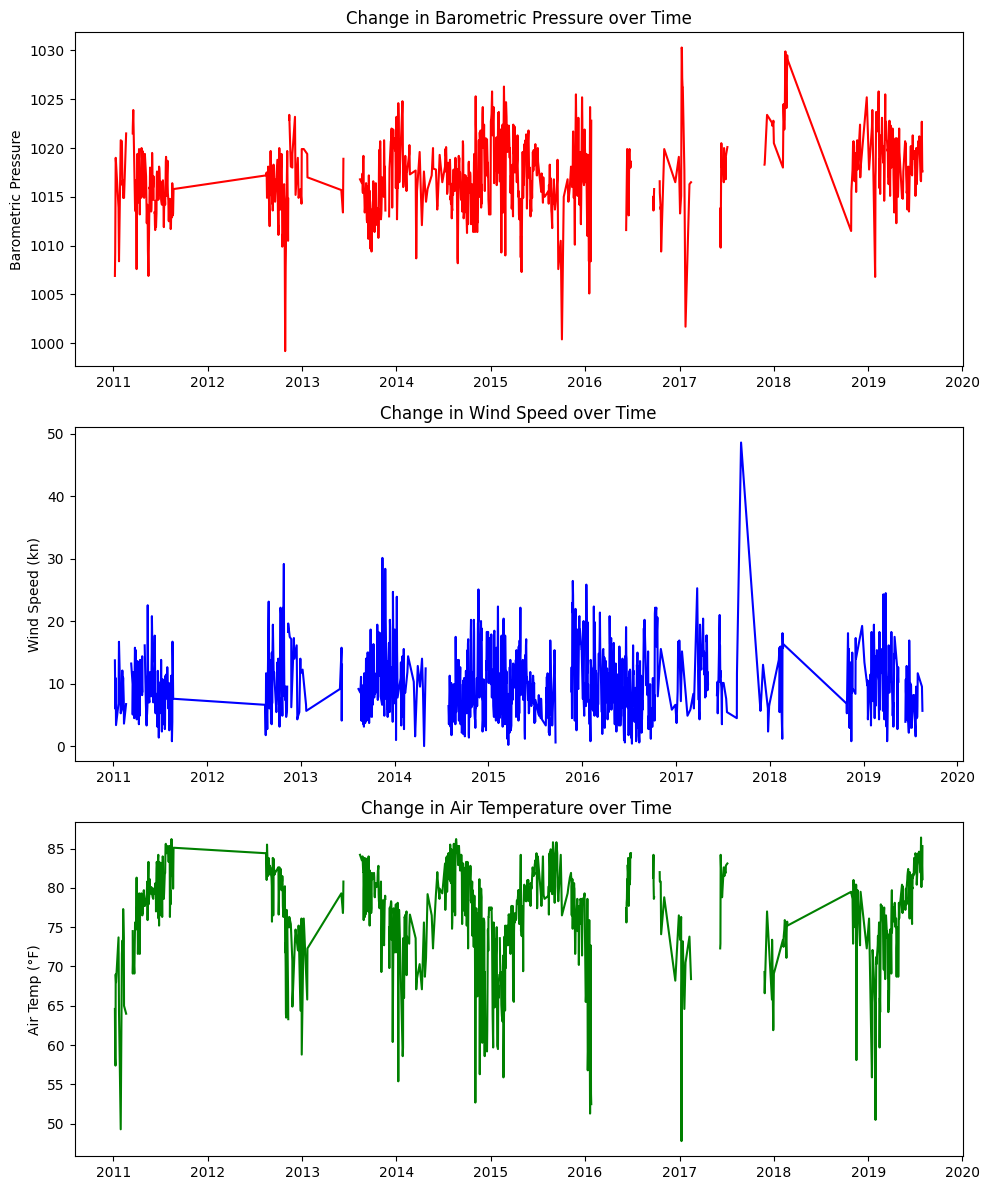

In [64]:
import matplotlib.pyplot as plt

# Assuming you have a 'Time' column in your DataFrame in a datetime format
# Convert 'Time' column to datetime if it's not already in datetime format
tiger_sharks_copy = tiger_sharks_full.copy()
tiger_sharks_copy['date'] = pd.to_datetime(tiger_sharks_copy['date'])

# Group the data by date and select the first timestamp of each day
tiger_sharks_daily = tiger_sharks_copy.groupby(tiger_sharks_copy['date'].dt.date).first()

# Create a figure with 3 subplots in a 3-row grid
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))  # Adjust the figsize as desired

# Plot Barometric Pressure in the first subplot
axes[0].plot(tiger_sharks_daily['date'], tiger_sharks_daily['Barometric Pressure'], color='red')
axes[0].set_ylabel('Barometric Pressure')
axes[0].set_title('Change in Barometric Pressure over Time')

# Plot Wind Speed in the second subplot
axes[1].plot(tiger_sharks_daily['date'], tiger_sharks_daily['Wind Speed (kn)'], color='blue')
axes[1].set_ylabel('Wind Speed (kn)')
axes[1].set_title('Change in Wind Speed over Time')

# Plot Air Temperature in the third subplot
axes[2].plot(tiger_sharks_daily['date'], tiger_sharks_daily['Air Temp (°F)'], color='green')
axes[2].set_ylabel('Air Temp (°F)')
axes[2].set_title('Change in Air Temperature over Time ')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


In [99]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
from datetime import timedelta

def is_in_gulf_of_mexico(lat, lon):
    # Define the coordinates of the Gulf of Mexico polygon
    gulf_of_mexico_polygon = Polygon([(31.4452, -119.01432),
                                      (13.78281, -120.421),
                                      (15.22841, -58.08411),
                                      (34.5388, -57.73242)])

    # Create a Point object for the given latitude and longitude
    point = Point(lon, lat)

    # Check if the point is within the Gulf of Mexico polygon
    if point.within(gulf_of_mexico_polygon):
        return True
    else:
        return False

def add_severe_weather_event_column(hurricane_df, sharks_df):
    # Convert the 'date' column in hurricane_df to datetime format
    hurricane_df['date'] = pd.to_datetime(hurricane_df['date'], errors='coerce')

    # Convert the 'latitude' and 'longitude' columns in hurricane_df to numeric
    hurricane_df['latitude'] = pd.to_numeric(hurricane_df['latitude'], errors='coerce')
    hurricane_df['longitude'] = pd.to_numeric(hurricane_df['longitude'], errors='coerce')

    # Set the 'severe weather event' column to False for all rows in sharks_df
    sharks_df['severe weather event'] = False

    # Loop over each row of the hurricane_df DataFrame
    for _, row in hurricane_df.iterrows():
        start_date = row['date'] - timedelta(days=3)
        end_date = row['date'] + timedelta(days=1)
        mask = (sharks_df['date'] >= start_date) & (sharks_df['date'] <= end_date)
        sharks_df.loc[mask, 'severe weather event'] = True

    return sharks_df

# tiger_sharks_full_with_weather = add_severe_weather_event_column(full_hurricane_1992, tiger_sharks_full_copy)
# tiger

In [175]:
t = pd.read_csv('C:/Users/Ben/Documents/GitHub/Animal-Motion-for-predictions/data/animals/tiger_sharks_full_more_detailed.csv')
t['date'] = pd.to_datetime(t['date'])

In [176]:
t['Dist from Feeding Spot (km)'] = t.apply(
    lambda row: closest_feeding_spot(row['latitude'], row['longitude']),
    axis=1
)     

t = add_severe_weather_event_column(full_hurricane_1992,t)

# tiger_2010 = tiger_sharks_full_copy2[tiger_sharks_full_copy2['year']==2010]
# t10_pos = tiger_2010[tiger_2010['severe weather event'] == True]
# print(tiger_sharks_full_copy2[tiger_sharks_full_copy2['severe weather event'] == True].shape)
# print(t10_pos.shape)
# t10_pos.head(4)
# tiger_sharks_full_copy2.drop()
# tiger_sharks_full_copy2 =  tiger_sharks_full_copy2.sort_values('date')
# tiger_sharks_full_copy2
t

,date,longitude,latitude,name,year,depth,species,Barometric Pressure,Wind Speed (kn),Air Temp (°F),Wind Gust (kn),Humidity (%),Dist from Feeding Spot (km),severe weather event
0,2018-10-27 01:57:00,-79.6616,26.3665,19687,2018,39.800587,Galeocerdo Cuvier,1011.5,6.8,79.5,10.3,-,90.024146,True
1,2018-10-27 12:57:00,-79.6805,26.4014,19687,2018,17.158911,Galeocerdo Cuvier,1014.4,6.22,77.2,8.75,-,87.567324,True
2,2018-10-27 23:10:00,-79.6860,26.4145,19687,2018,17.158911,Galeocerdo Cuvier,1014.2,5.05,82,8.36,-,86.599659,True
3,2018-10-28 01:27:00,-79.7760,26.6475,19687,2018,-78.478249,Galeocerdo Cuvier,1015.6,5.25,79.3,5.83,-,72.276662,True
4,2018-10-28 03:13:00,-79.7416,26.6634,19687,2018,-74.866028,Galeocerdo Cuvier,1017.5,13.61,74.7,16.72,-,68.554726,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5767,2018-02-19 19:49:00,-90.1690,27.8840,169320,2018,-71.822693,Galeocerdo Cuvier,1024.8,16.33,76.1,19.83,78,157.520853,False
5768,2018-02-20 12:29:00,-89.9760,28.0700,169320,2018,-47.141979,Galeocerdo Cuvier,1026.7,15.94,75.4,18.08,83.5,170.145758,False
5769,2018-02-20 14:09:00,-90.0260,28.0480,169320,2018,-54.748688,Galeocerdo Cuvier,1027.9,15.94,76.3,19.63,83.9,165.859188,False
5770,2018-02-21 13:46:00,-89.9080,28.0650,169320,2018,-46.006077,Galeocerdo Cuvier,1029.5,15.75,75.7,17.69,83,176.796226,False


In [177]:
t.to_csv('C:/Users/Ben/Documents/GitHub/Animal-Motion-for-predictions/data/animals/tiger_sharks_full_more_detailed_with_dependantVar.csv',index=False)

In [178]:
t = pd.read_csv('C:/Users/Ben/Documents/GitHub/Animal-Motion-for-predictions/data/animals/tiger_sharks_full_more_detailed_with_dependantVar.csv')
t.columns

Index(['date', 'longitude', 'latitude', 'name', 'year', 'depth', 'species',
       'Barometric Pressure', 'Wind Speed (kn)', 'Air Temp (°F)',
       'Wind Gust (kn)', 'Humidity (%)', 'Dist from Feeding Spot (km)',
       'severe weather event'],
      dtype='object')

In [172]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named "df"
# selected_columns = ['longitude', 'latitude', 'year', 'depth',
#                     'Barometric Pressure', 'Wind Speed (kn)', 'Air Temp (°F)',
#                     'Dist from Feeding Spot (km)', 'severe weather event']
# Accuracy: 0.713764
# Precision: 0.593156
# Recall: 0.549296
# F1-Score: 0.570384


# selected_columns = ['depth',
#                     'Barometric Pressure', 'Wind Speed (kn)', 'Air Temp (°F)',
#                     'Dist from Feeding Spot (km)', 'severe weather event']
# 0   Accuracy  0.738124
# 1  Precision  0.640816
# 2     Recall  0.552817
# 3   F1-Score  0.593573


# selected_columns = ['depth',
#                     'Barometric Pressure', 'Wind Speed (kn)', 'severe weather event']
# 0   Accuracy  0.660171
# 1  Precision  0.857143
# 2     Recall  0.021127
# 3   F1-Score  0.041237

# selected_columns = ['depth',
#                     'Wind Speed (kn)', 'Air Temp (°F)',
#                     'Dist from Feeding Spot (km)', 'severe weather event']
# 0   Accuracy  0.736906
# 1  Precision  0.644068
# 2     Recall  0.535211
# 3   F1-Score  0.584615

# selected_columns = ['Wind Speed (kn)', 'Air Temp (°F)','Barometric Pressure',
#                     'Dist from Feeding Spot (km)', 'severe weather event']
# 0   Accuracy  0.739342
# 1  Precision  0.642276
# 2     Recall  0.556338
# 3   F1-Score  0.596226

# selected_columns = ['Wind Speed (kn)', 'Air Temp (°F)','depth',
#                     'Dist from Feeding Spot (km)', 'severe weather event']
# 0   Accuracy  0.739342
# 1  Precision  0.642276
# 2     Recall  0.556338
# 3   F1-Score  0.596226

selected_columns = ['depth','Barometric Pressure', 'Wind Speed (kn)', 'Air Temp (°F)',
                    'Dist from Feeding Spot (km)', 'Wind Gust (kn)', 'Humidity (%)',
                    'severe weather event' ]

# Select the columns of interest from the DataFrame
selected_df = t_sharks[selected_columns]
selected_df.dropna(inplace=True)

# Split the data into independent variables (X) and the dependent variable (y)
X = selected_df.iloc[:, :-1]
y = selected_df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


KeyError: "['Dist from Feeding Spot (km)'] not in index"

In [155]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

pd.set_option('display.max_colwidth', None)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Explanation of metrics
# explanation = {
#     "Accuracy": "Accuracy is the proportion of correct predictions out of the total number of samples.",
#     "Precision": "Precision is the ability of the model to correctly identify positive samples out of the total predicted positive samples.",
#     "Recall": "Recall is the ability of the model to correctly identify positive samples out of the total actual positive samples.",
#     "F1-Score": "F1-Score is the harmonic mean of precision and recall. It provides a balanced measure between the two metrics."
# }

# Create a report DataFrame
report_data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Score": [accuracy, precision, recall, f1]
    # ,"Explanation": [explanation["Accuracy"], explanation["Precision"], explanation["Recall"], explanation["F1-Score"]]
}
report_df = pd.DataFrame(report_data)

# Print the report
print("Evaluation Report:")
print(report_df)

Evaluation Report:
      Metric     Score
0   Accuracy  0.738124
1  Precision  0.640816
2     Recall  0.552817
3   F1-Score  0.593573


In [158]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy import stats

# Assuming your DataFrame is named "df"
selected_columns = ['longitude', 'latitude', 'year', 'depth',
                    'Barometric Pressure', 'Wind Speed (kn)', 'Air Temp (°F)',
                    'Dist from Feeding Spot (km)', 'severe weather event']

# Select the columns of interest from the DataFrame
selected_df = t_sharks[selected_columns]
selected_df.dropna(inplace=True)

# Split the data into independent variables (X) and the dependent variable (y)
X = selected_df.iloc[:, :-1]
y = selected_df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Compute confidence intervals (95% confidence level)
confidence = 0.95
n = len(y_test)
z = stats.norm.ppf((1 + confidence) / 2)

accuracy_interval = z * np.sqrt((accuracy * (1 - accuracy)) / n)
precision_interval = z * np.sqrt((precision * (1 - precision)) / n)
recall_interval = z * np.sqrt((recall * (1 - recall)) / n)
f1_interval = z * np.sqrt((f1 * (1 - f1)) / n)

# Create a DataFrame to store the evaluation metrics and confidence intervals
evaluation_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [accuracy, precision, recall, f1],
    'Confidence Interval': [accuracy_interval, precision_interval, recall_interval, f1_interval]
})

# Print the evaluation report with confidence intervals
print("Evaluation Report:")
print(evaluation_df)


Evaluation Report:
      Metric     Score  Confidence Interval
0   Accuracy  0.713764             0.030918
1  Precision  0.593156             0.033603
2     Recall  0.549296             0.034035
3   F1-Score  0.570384             0.033861


C:\Users\Ben\AppData\Local\Temp\ipykernel_6768\840890720.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.dropna(inplace=True)
c:\Users\Ben\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


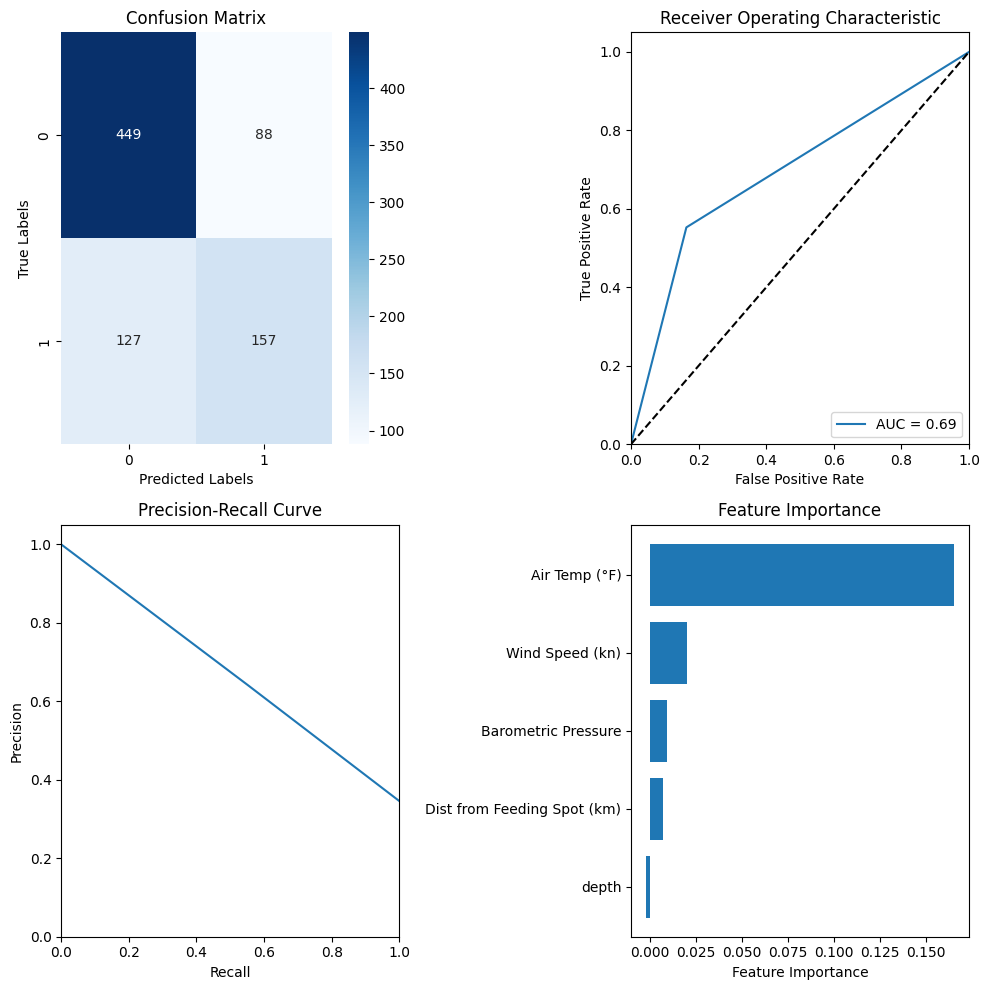

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.inspection import permutation_importance

# Assuming you have already trained the model and made predictions on the test data

# Create a figure with two rows and two columns
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axs[0, 0])
axs[0, 0].set_title("Confusion Matrix")
axs[0, 0].set_xlabel("Predicted Labels")
axs[0, 0].set_ylabel("True Labels")

# Compute the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
axs[0, 1].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
axs[0, 1].plot([0, 1], [0, 1], "k--")
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel("False Positive Rate")
axs[0, 1].set_ylabel("True Positive Rate")
axs[0, 1].set_title("Receiver Operating Characteristic")
axs[0, 1].legend(loc="lower right")

# Compute precision, recall, and thresholds for the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot the precision-recall curve
axs[1, 0].plot(recall, precision)
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel("Recall")
axs[1, 0].set_ylabel("Precision")
axs[1, 0].set_title("Precision-Recall Curve")

# Compute and plot feature importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

axs[1, 1].barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])
axs[1, 1].set_xlabel("Feature Importance")
axs[1, 1].set_title("Feature Importance")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()
